<div class="alert alert-block alert-success">  
<h1><center><strong>X-RAY BODY PARTS PREDICTION 🦴</strong></center></h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, InputLayer
import cv2
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-info">  
<h3><strong>DATA CLEANING + PREPROCESSING</strong></h3>
</div>

In [5]:
train_data = pd.read_csv('/content/drive/MyDrive/aiproject/train_df.csv')
test_data = pd.read_csv('/content/drive/MyDrive/aiproject/train_df.csv')

In [6]:
train_data['Target'] = train_data['Target'].apply(lambda x: x.strip(' '))


In [9]:
TRAIN_PATH = '/content/drive/MyDrive/aiproject/images/train//'

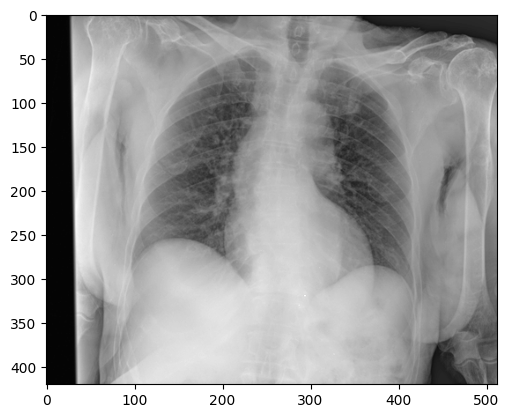

In [10]:
val = train_data.loc[7].SOPInstanceUID
val = val + '-c.png'
img = plt.imread(TRAIN_PATH + val)
plt.imshow(img,cmap='gray')

In [11]:
multi = []
multi_target = []
for i,val in enumerate(train_data.Target):
        if len(val) > 2:
            multi.append(train_data.iloc[i].SOPInstanceUID)
            multi_target.append(train_data.iloc[i].Target)

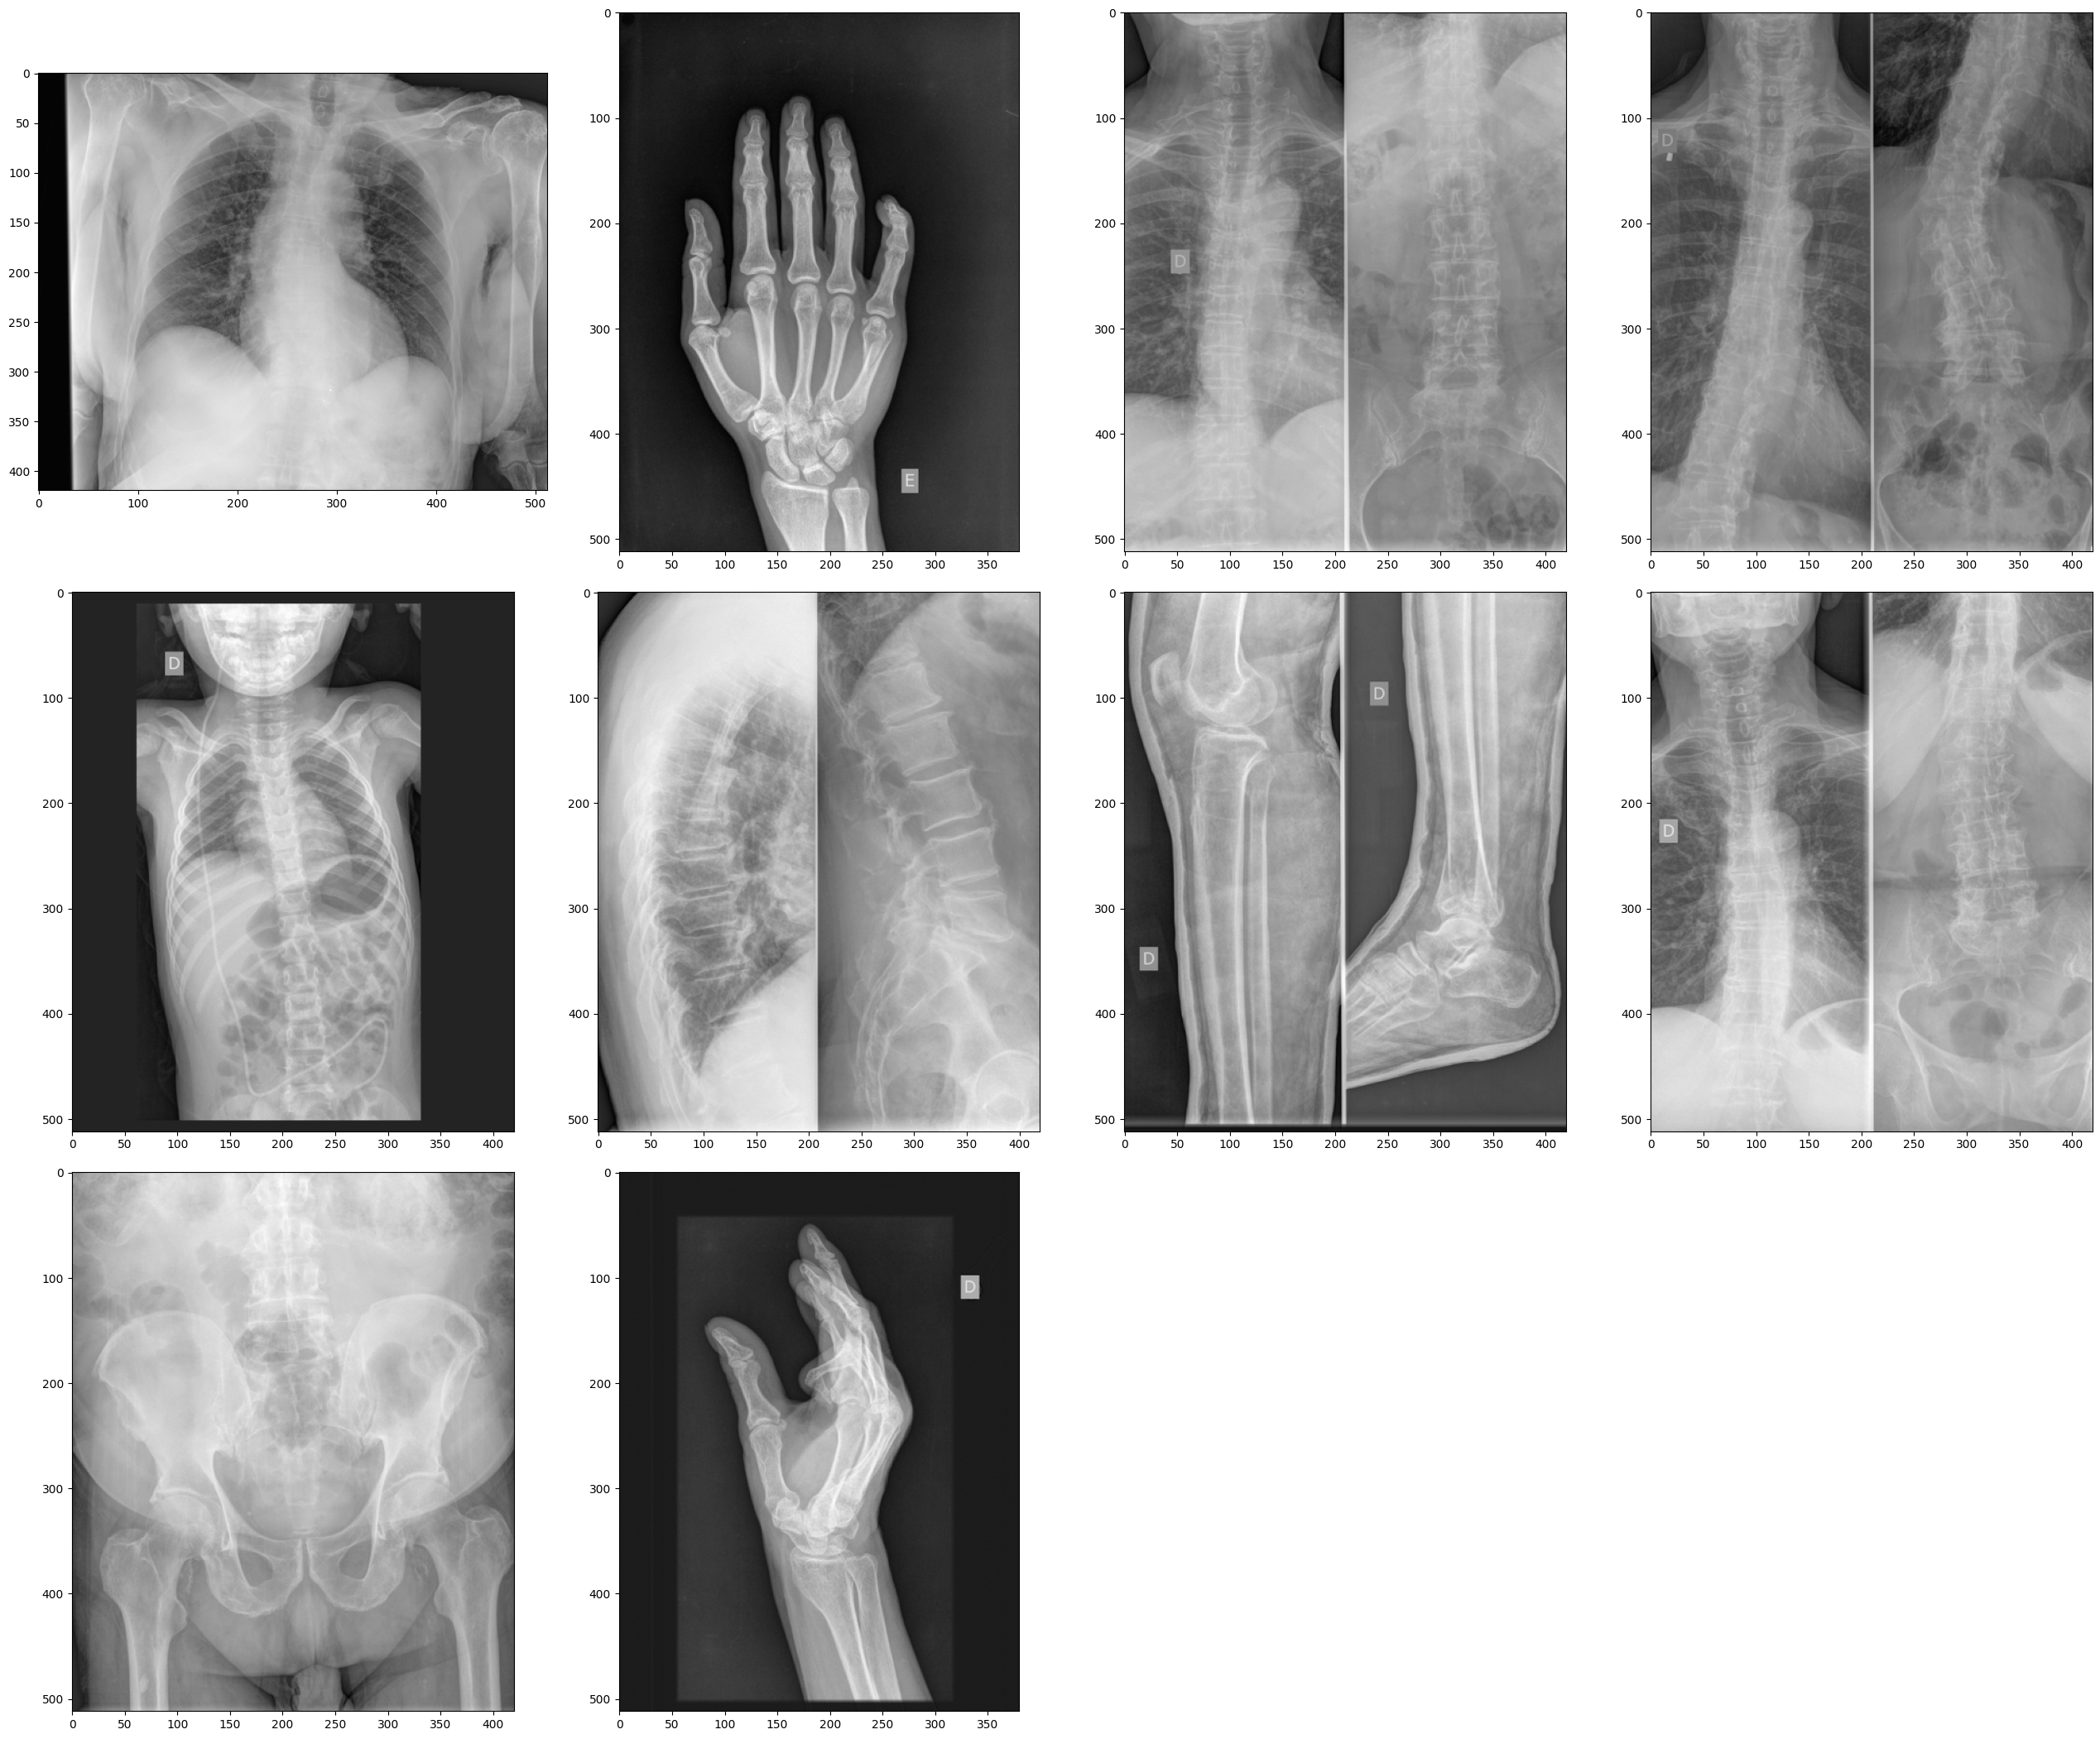

In [12]:
plt.figure(figsize=(26,28))
for i in range(10):
    plt.subplot(4,4,i+1)
    val = multi[i] + '-c.png'
    img = plt.imread(TRAIN_PATH + val)
    plt.imshow(img,cmap='gray')

plt.tight_layout(pad=1.5)

***Checking both Original Image and Normalize Image***

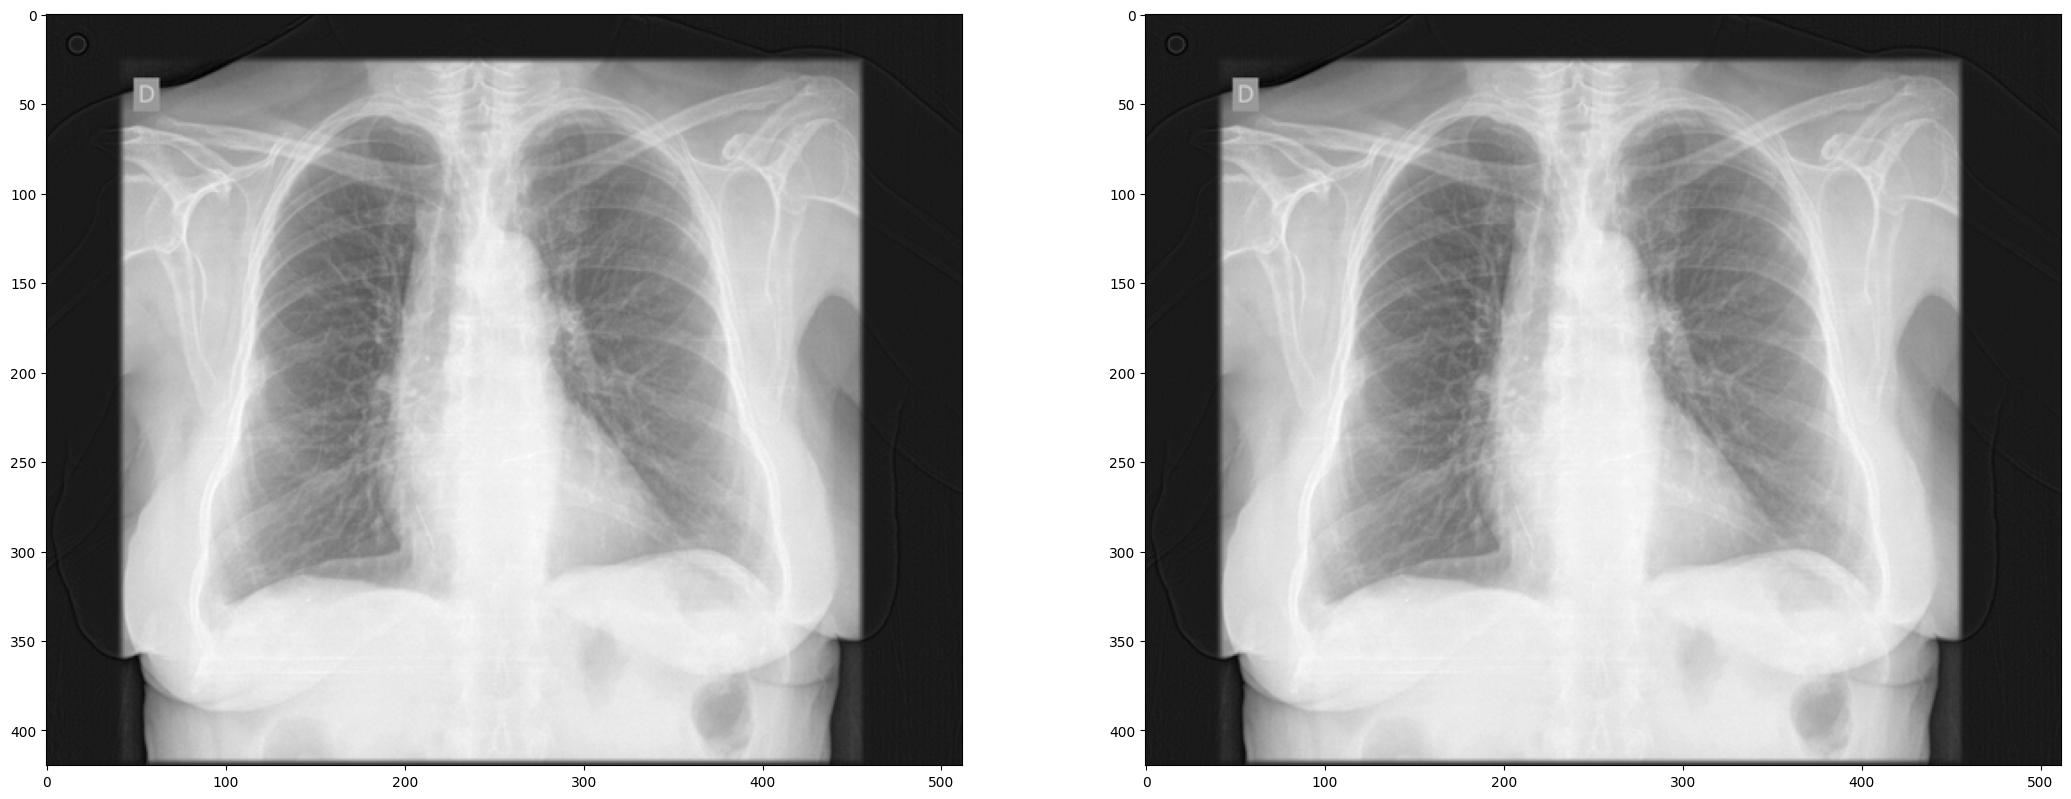

In [14]:
plt.figure(figsize=(26,28))
img = plt.imread('/content/drive/MyDrive/aiproject/image_png.png')
norm_img = cv2.normalize(img,None,alpha=0,beta=500,norm_type=cv2.NORM_MINMAX)
plt.subplot(2,2,1)
plt.imshow(norm_img,cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img,cmap='gray')

In [15]:
train_dff = pd.DataFrame()
train_dff['SOPInstanceUID'] = train_data['SOPInstanceUID']
train_dff['Target'] = train_data['Target']

In [16]:
train_dff.head(2)

SOPInstanceUID Target
0  1.2.826.0.1.3680043.8.498.10025629581362719970...      0
1  1.2.826.0.1.3680043.8.498.10036150326276641158...     15

In [17]:
len(multi_target[6])

7

***We will do One-Hot Encoding for every label like if the label have Abdomen then Abdomen will only be 1 and others will be zero***

In [18]:
def Names(label):
    if label == '0':
        return 'Abdomen'
    elif label == '1':
        return 'Ankle'
    elif label == '2':
        return 'Cervical Spine'
    elif label == '3':
        return 'Chest'
    elif label == '4':
        return 'Clavicles'
    elif label == '5':
        return 'Elbow'
    elif label == '6':
        return 'Feet'
    elif label == '7':
        return 'Finger'
    elif label == '8':
        return 'Forearm'
    elif label == '9':
        return 'Hand'
    elif label == '10':
        return 'Hip'
    elif label == '11':
        return 'Knee'
    elif label == '12':
        return 'Lower Leg'
    elif label == '13':
        return 'Lumbar Spine'
    elif label == '14':
        return 'Others'
    elif label == '15':
        return 'Pelvis'
    elif label == '16':
        return 'Shoulder'
    elif label == '17':
        return 'Sinus'
    elif label == '18':
        return 'Skull'
    elif label == '19':
        return 'Thigh'
    elif label == '20':
        return 'Thoracic Spine'
    elif label == '21':
        return 'Wrist'

In [19]:
x,x1 = train_dff.iloc[7]['Target'].split(' ',1)
x_name = Names(x)
x1_name = Names(x1)
print(x_name + ' '+ x1_name)

Lumbar Spine Thoracic Spine


In [20]:
label = []
for i,val in enumerate(train_dff.Target):

    if len(val) > 2 and len(val) <= 6:

        x,x1 = train_dff.iloc[i]['Target'].split(' ',1)
        x_name = Names(x)
        x1_name = Names(x1)
        total = x_name + ' ' + x1_name
        label.append(total)
        train_dff.iloc[i]['label'] = total
    elif len(val) >=7:

        x,x1,x2 = train_dff.iloc[i]['Target'].split(' ',2)
        x_name = Names(x)
        x1_name = Names(x1)
        x2_name = Names(x2)
        total = x_name+' '+x1_name+' '+x2_name
        label.append(total)
        train_dff.iloc[i]['label'] = total
    else:
        x = train_dff.iloc[i]['Target']
        x_name = Names(x)
        label.append(x_name)
        train_dff.iloc[i]['label'] = x_name

train_dff['label'] = label

Streaming output truncated to the last 5000 lines.
<ipython-input-20-003041eeef90>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dff.iloc[i]['label'] = x_name
<ipython-input-20-003041eeef90>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dff.iloc[i]['label'] = x_name
<ipython-input-20-003041eeef90>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dff.iloc[i]['label'] = x_name
<ipython-input-20-003041eeef90>:25

In [21]:
train_dff.head(19)

SOPInstanceUID Target  \
0   1.2.826.0.1.3680043.8.498.10025629581362719970...      0   
1   1.2.826.0.1.3680043.8.498.10036150326276641158...     15   
2   1.2.826.0.1.3680043.8.498.10038426859954986240...     12   
3   1.2.826.0.1.3680043.8.498.10050991192143676483...     14   
4   1.2.826.0.1.3680043.8.498.10053309524595490852...      3   
5   1.2.826.0.1.3680043.8.498.10053755320637729867...      3   
6   1.2.826.0.1.3680043.8.498.10062189329714053601...     14   
7   1.2.826.0.1.3680043.8.498.10065930002825553435...  13 20   
8   1.2.826.0.1.3680043.8.498.10072001800484199846...      3   
9   1.2.826.0.1.3680043.8.498.10077219503857952412...      3   
10  1.2.826.0.1.3680043.8.498.10080310665124574896...      3   
11  1.2.826.0.1.3680043.8.498.10089082474655893722...     14   
12  1.2.826.0.1.3680043.8.498.10092177056782233773...      3   
13  1.2.826.0.1.3680043.8.498.10093718510761734264...      3   
14  1.2.826.0.1.3680043.8.498.10096016393614468374...      5   
15  1.2.826.0.1.3680043.8.498.10100428214462026127...     14   
16  1.2.826.0.1.3680043.8.498.10105498531842222086...      3   
17  1.2.826.0.1.3680043.8.498.10107388868056003719...      0   
18  1.2.826.0.1.3680043.8.498.10121269997000927609...     17   

                          label  
0                       Abdomen  
1                        Pelvis  
2                     Lower Leg  
3                        Others  
4                         Chest  
5                         Chest  
6                        Others  
7   Lumbar Spine Thoracic Spine  
8                         Chest  
9                         Chest  
10                        Chest  
11                       Others  
12                        Chest  
13                        Chest  
14                        Elbow  
15                       Others  
16                        Chest  
17                      Abdomen  
18                        Sinus

In [22]:
train_dff = pd.get_dummies(train_dff['label'])
train_dff['SOPInstanceUID'] = train_data['SOPInstanceUID']
train_dff['Target'] = train_data['Target']
train_dff.head(3)

Abdomen  Abdomen Chest  Abdomen Pelvis  Ankle  Ankle Feet  \
0     True          False           False  False       False   
1    False          False           False  False       False   
2    False          False           False  False       False   

   Ankle Knee Lower Leg  Ankle Lower Leg  Cervical Spine  \
0                 False            False           False   
1                 False            False           False   
2                 False            False           False   

   Cervical Spine Lumbar Spine Thoracic Spine  Cervical Spine Thoracic Spine  \
0                                       False                          False   
1                                       False                          False   
2                                       False                          False   

   ...  Pelvis  Pelvis Thigh  Shoulder  Sinus  Skull  Thigh  Thoracic Spine  \
0  ...   False         False     False  False  False  False           False   
1  ...    True         False     False  False  False  False           False   
2  ...   False         False     False  False  False  False           False   

   Wrist                                     SOPInstanceUID  Target  
0  False  1.2.826.0.1.3680043.8.498.10025629581362719970...       0  
1  False  1.2.826.0.1.3680043.8.498.10036150326276641158...      15  
2  False  1.2.826.0.1.3680043.8.498.10038426859954986240...      12  

[3 rows x 43 columns]

In [23]:
new_train_data = pd.merge(train_data,train_dff,on='SOPInstanceUID')

In [24]:
new_train_data.head(20)

SOPInstanceUID Target_x  \
0   1.2.826.0.1.3680043.8.498.10025629581362719970...        0   
1   1.2.826.0.1.3680043.8.498.10036150326276641158...       15   
2   1.2.826.0.1.3680043.8.498.10038426859954986240...       12   
3   1.2.826.0.1.3680043.8.498.10050991192143676483...       14   
4   1.2.826.0.1.3680043.8.498.10053309524595490852...        3   
5   1.2.826.0.1.3680043.8.498.10053755320637729867...        3   
6   1.2.826.0.1.3680043.8.498.10062189329714053601...       14   
7   1.2.826.0.1.3680043.8.498.10065930002825553435...    13 20   
8   1.2.826.0.1.3680043.8.498.10072001800484199846...        3   
9   1.2.826.0.1.3680043.8.498.10077219503857952412...        3   
10  1.2.826.0.1.3680043.8.498.10080310665124574896...        3   
11  1.2.826.0.1.3680043.8.498.10089082474655893722...       14   
12  1.2.826.0.1.3680043.8.498.10092177056782233773...        3   
13  1.2.826.0.1.3680043.8.498.10093718510761734264...        3   
14  1.2.826.0.1.3680043.8.498.10096016393614468374...        5   
15  1.2.826.0.1.3680043.8.498.10100428214462026127...       14   
16  1.2.826.0.1.3680043.8.498.10105498531842222086...        3   
17  1.2.826.0.1.3680043.8.498.10107388868056003719...        0   
18  1.2.826.0.1.3680043.8.498.10121269997000927609...       17   
19  1.2.826.0.1.3680043.8.498.10135999234351484423...        2   

    MultiImageType ImageType ImageType1  InstanceCreationDate  \
0              1.0  ORIGINAL    PRIMARY                   NaN   
1              1.0  ORIGINAL    PRIMARY                   NaN   
2              1.0  ORIGINAL    PRIMARY                   NaN   
3              NaN       NaN        NaN                   NaN   
4              1.0  ORIGINAL    PRIMARY                   NaN   
5              1.0  ORIGINAL    PRIMARY                   NaN   
6              1.0  ORIGINAL    PRIMARY                   NaN   
7              1.0  ORIGINAL    PRIMARY                   NaN   
8              1.0  ORIGINAL    PRIMARY                   NaN   
9              1.0  ORIGINAL    PRIMARY                   NaN   
10             1.0  ORIGINAL    PRIMARY                   NaN   
11             1.0  ORIGINAL    PRIMARY                   NaN   
12             1.0  ORIGINAL    PRIMARY                   NaN   
13             1.0  ORIGINAL    PRIMARY                   NaN   
14             1.0  ORIGINAL    PRIMARY                   NaN   
15             1.0  ORIGINAL    PRIMARY                   NaN   
16             1.0  ORIGINAL    PRIMARY                   NaN   
17             1.0  ORIGINAL    PRIMARY                   NaN   
18             1.0  ORIGINAL    PRIMARY                   NaN   
19             1.0  ORIGINAL    PRIMARY                   NaN   

    InstanceCreationTime                   SOPClassUID  StudyDate  SeriesDate  \
0                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
1                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
2                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
3                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
4                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
5                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
6                    NaN  1.2.840.10008.5.1.4.1.1.12.2        NaN         NaN   
7                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
8                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
9                    NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
10                   NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
11                   NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
12                   NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
13                   NaN     1.2.840.10008.5.1.4.1.1.1        NaN         NaN   
14                   NaN     1.2.840.10008.5.1.4.1.1.1        NaN      

In [25]:
new_train_data.drop('Target_y',axis=1,inplace=True)
new_train_data.columns[65:]

Index(['Abdomen', 'Abdomen Chest', 'Abdomen Pelvis', 'Ankle', 'Ankle Feet',
       'Ankle Knee Lower Leg', 'Ankle Lower Leg', 'Cervical Spine',
       'Cervical Spine Lumbar Spine Thoracic Spine',
       'Cervical Spine Thoracic Spine', 'Chest', 'Chest Feet', 'Chest Finger',
       'Chest Pelvis', 'Clavicles', 'Elbow', 'Elbow Forearm', 'Feet', 'Finger',
       'Finger Hand', 'Forearm', 'Forearm Shoulder', 'Hand', 'Hand Wrist',
       'Hip', 'Hip Knee Thigh', 'Hip Thigh', 'Knee', 'Knee Lower Leg',
       'Lower Leg', 'Lumbar Spine', 'Lumbar Spine Thoracic Spine', 'Others',
       'Pelvis', 'Pelvis Thigh', 'Shoulder', 'Sinus', 'Skull', 'Thigh',
       'Thoracic Spine', 'Wrist'],
      dtype='object')

In [26]:
TRAIN_PATH = '../content/drive/MyDrive/aiproject/images/train/'
X = []
y = []

***Images have different sizes like (512,420) or (420,512) and others. but we need to fix this to (128,128) pixel and we use opencv module name cv2. cv2.resize() use to resize it to (128,128)***

In [27]:
for val in new_train_data.SOPInstanceUID:
    idd = val
    val = val + '-c.png'
    img = plt.imread(TRAIN_PATH + val)
    img = cv2.resize(img,dsize=(128,128))
    img_norm = cv2.normalize(img,None,alpha=0,beta=500,norm_type=cv2.NORM_MINMAX)
    y.append(np.ndarray.flatten(np.array(new_train_data.loc[new_train_data['SOPInstanceUID'] == idd][new_train_data.columns[65:]])))
    X.append(np.expand_dims(img,axis=-1))

X = np.array(X)
y = np.array(y)

In [28]:
np.argmax(y[0])

0

***Checking the Data from train folder***

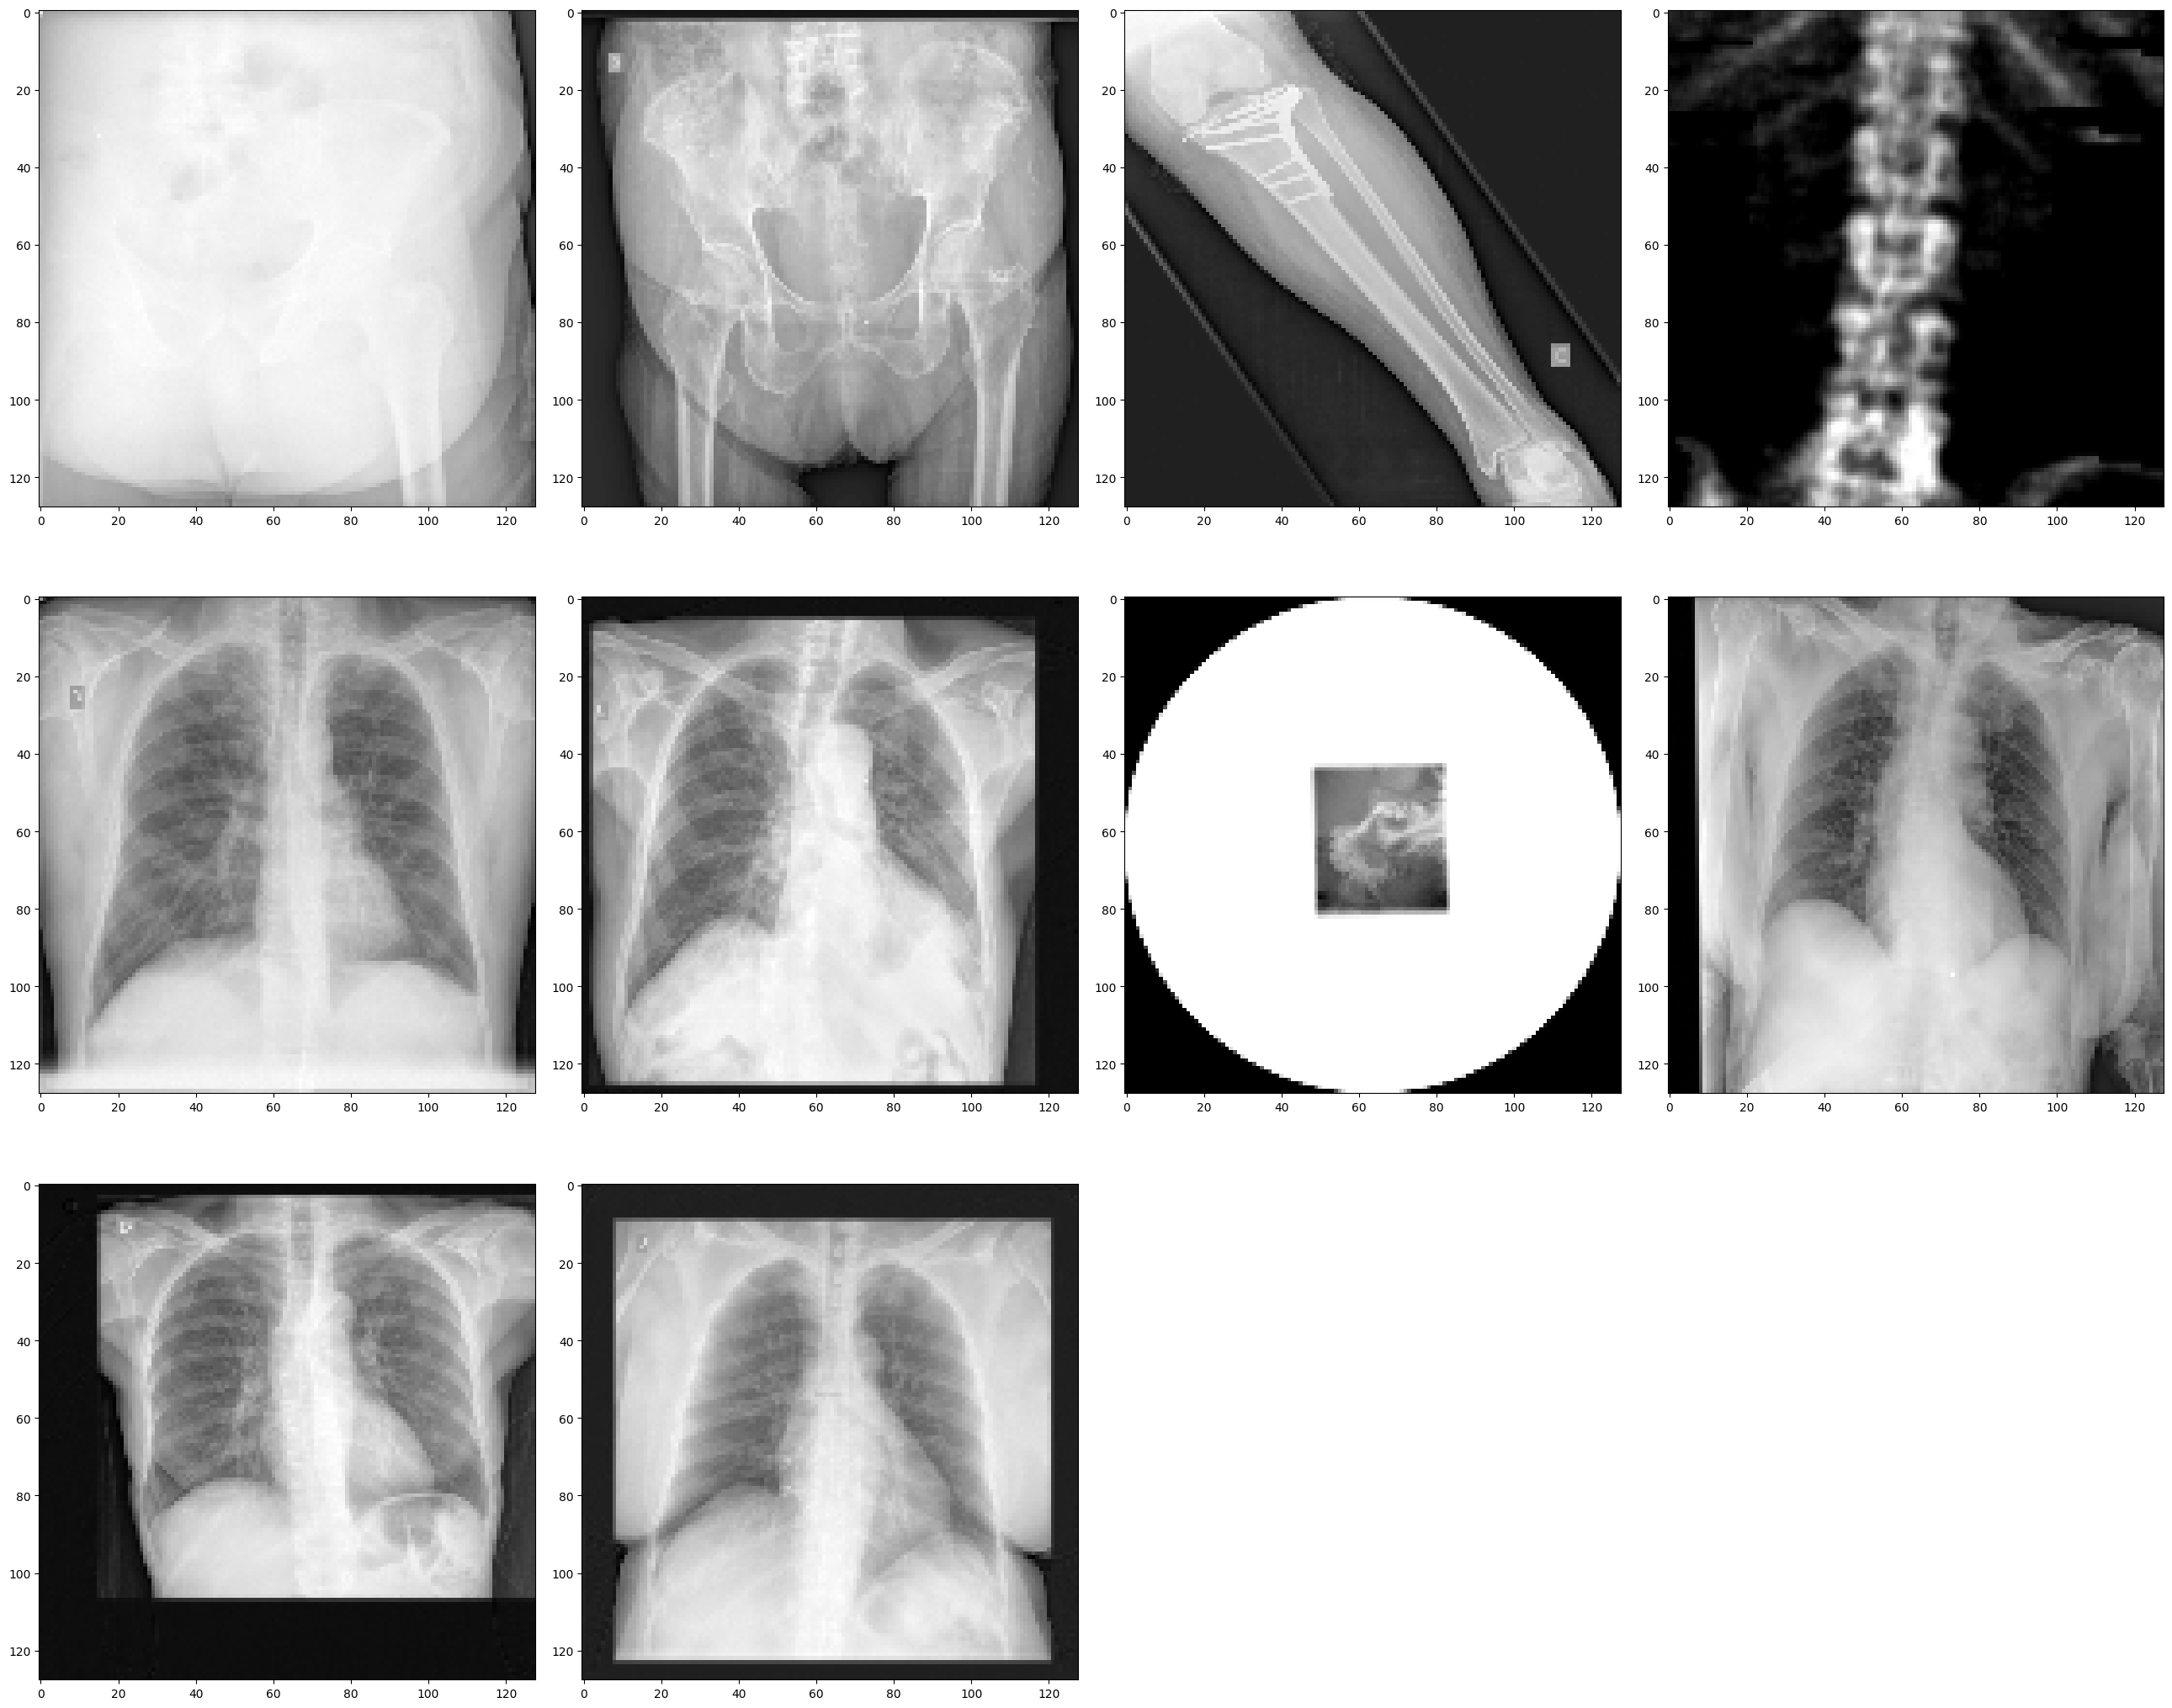

In [29]:
fig = plt.figure(figsize=(26,28))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap='gray')
plt.tight_layout(pad=1.4)

[[[0.07664675]
  [0.08431373]
  [0.08431373]
  ...
  [0.08252911]
  [0.0839614 ]
  [0.08200061]]

 [[0.08129596]
  [0.08182445]
  [0.07647059]
  ...
  [0.07895987]
  [0.07609528]
  [0.08039216]]

 [[0.07823224]
  [0.07735141]
  [0.08107384]
  ...
  [0.07843138]
  [0.08235294]
  [0.07715227]]

 ...

 [[0.06970742]
  [0.08843444]
  [0.0821538 ]
  ...
  [0.08235294]
  [0.08019302]
  [0.07450981]]

 [[0.07202053]
  [0.08717831]
  [0.08288144]
  ...
  [0.09215686]
  [0.08325674]
  [0.07752758]]

 [[0.07611826]
  [0.08841146]
  [0.07825521]
  ...
  [0.07699908]
  [0.07825521]
  [0.08217678]]]


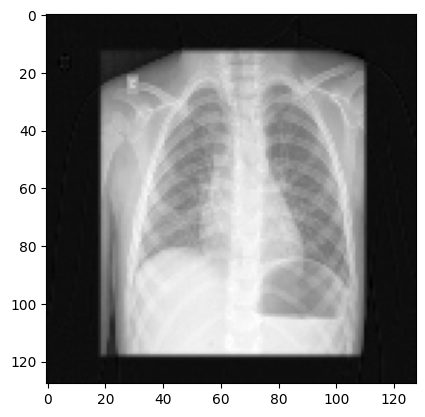

In [30]:
print(X[40])
plt.imshow(X[40],cmap='gray')

In [31]:
y[0]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [33]:
np.argmax(y_train[2])

10

# *CNN MODEL WITH MULTI LAYERS*

In [34]:
model = tf.keras.models.Sequential()
model.add(InputLayer(input_shape=(128,128,1)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu', kernel_initializer='he_normal', padding='same'))
#model.add(Conv2D(128,kernel_size=(3,3),activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(256,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
#model.add(Conv2D(256,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.6))

model.add(Conv2D(512,kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dense(2048, activation="relu"))
model.add(Dense(41, activation="softmax"))

model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 256)       0

In [35]:
model.fit(x_train, y_train, batch_size=5, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)], epochs=25)


Epoch 1/25
261/261 [==============================] - 21s 52ms/step - loss: 0.1086 - accuracy: 0.4313
Epoch 2/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0668 - accuracy: 0.4927
Epoch 3/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0562 - accuracy: 0.5802
Epoch 4/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0474 - accuracy: 0.6393
Epoch 5/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0407 - accuracy: 0.6930
Epoch 6/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0340 - accuracy: 0.7460
Epoch 7/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0285 - accuracy: 0.8051
Epoch 8/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0245 - accuracy: 0.8235
Epoch 9/25
261/261 [==============================] - 13s 49ms/step - loss: 0.0184 - accuracy: 0.8657
Epoch 10/25
261/261 [==============================] - 13s 49ms/step - loss: 0.013

In [36]:
model.evaluate(x_test,y_test)

14/14 [==============================] - 3s 78ms/step - loss: 0.0809 - accuracy: 0.7609


[0.08094115555286407, 0.7609195113182068]

In [51]:
TEST_PATH = '../content/drive/MyDrive/aiproject/images/test/'
test_inp = []

In [45]:
names_col = new_train_data.columns[65:]
names_col

Index(['Abdomen', 'Abdomen Chest', 'Abdomen Pelvis', 'Ankle', 'Ankle Feet',
       'Ankle Knee Lower Leg', 'Ankle Lower Leg', 'Cervical Spine',
       'Cervical Spine Lumbar Spine Thoracic Spine',
       'Cervical Spine Thoracic Spine', 'Chest', 'Chest Feet', 'Chest Finger',
       'Chest Pelvis', 'Clavicles', 'Elbow', 'Elbow Forearm', 'Feet', 'Finger',
       'Finger Hand', 'Forearm', 'Forearm Shoulder', 'Hand', 'Hand Wrist',
       'Hip', 'Hip Knee Thigh', 'Hip Thigh', 'Knee', 'Knee Lower Leg',
       'Lower Leg', 'Lumbar Spine', 'Lumbar Spine Thoracic Spine', 'Others',
       'Pelvis', 'Pelvis Thigh', 'Shoulder', 'Sinus', 'Skull', 'Thigh',
       'Thoracic Spine', 'Wrist'],
      dtype='object')

In [46]:
set(multi_target)

{'0 15',
 '0 3',
 '1 11 12',
 '1 12',
 '1 6',
 '10 11 19',
 '10 19',
 '11 12',
 '13 20',
 '15 19',
 '2 13 20',
 '2 20',
 '3 15',
 '3 6',
 '3 7',
 '5 8',
 '7 9',
 '8 16',
 '9 21'}

In [47]:
def Names_rev(label):
    if label == '1':
        return '0 3'
    elif label == '2':
        return '0 15'
    elif label == '5':
        return '1 11 12'
    elif label == '6':
        return '1 12'
    elif label == '4':
        return '1 6'
    elif label == '25':
        return '10 11 19'
    elif label == '26':
        return '10 19'
    elif label == '28':
        return '11 12'
    elif label == '31':
        return '13 20'
    elif label == '34':
        return '15 19'
    elif label == '8':
        return '2 13 20'
    elif label == '9':
        return '2 20'
    elif label == '13':
        return '3 15'
    elif label == '11':
        return '3 6'
    elif label == '12':
        return '3 7'
    elif label == '16':
        return '5 8'
    elif label == '19':
        return '7 9'
    elif label == '21':
        return '8 16'
    elif label == '23':
        return '9 21'
    elif label == '0':
        return '0'
    elif label == '3':
        return '3'
    elif label == '7':
        return '7'
    elif label == '10':
        return '10'
    elif label == '14':
        return '14'
    elif label == '15':
        return '15'
    elif label == '17':
        return '17'
    elif label == '18':
        return '18'
    elif label == '19':
        return '19'
    elif label == '20':
        return '20'
    elif label == '22':
        return '22'
    elif label == '24':
        return '24'
    elif label == '27':
        return '27'
    elif label == '29':
        return '29'
    elif label == '30':
        return '30'
    elif label == '32':
        return '32'
    elif label == '33':
        return '33'
    elif label == '35':
        return '35'
    elif label == '36':
        return '36'
    elif label == '37':
        return '37'
    elif label == '38':
        return '38'
    elif label == '39':
        return '39'
    elif label == '40':
        return '40'

14/14 [==============================] - 0s 16ms/step


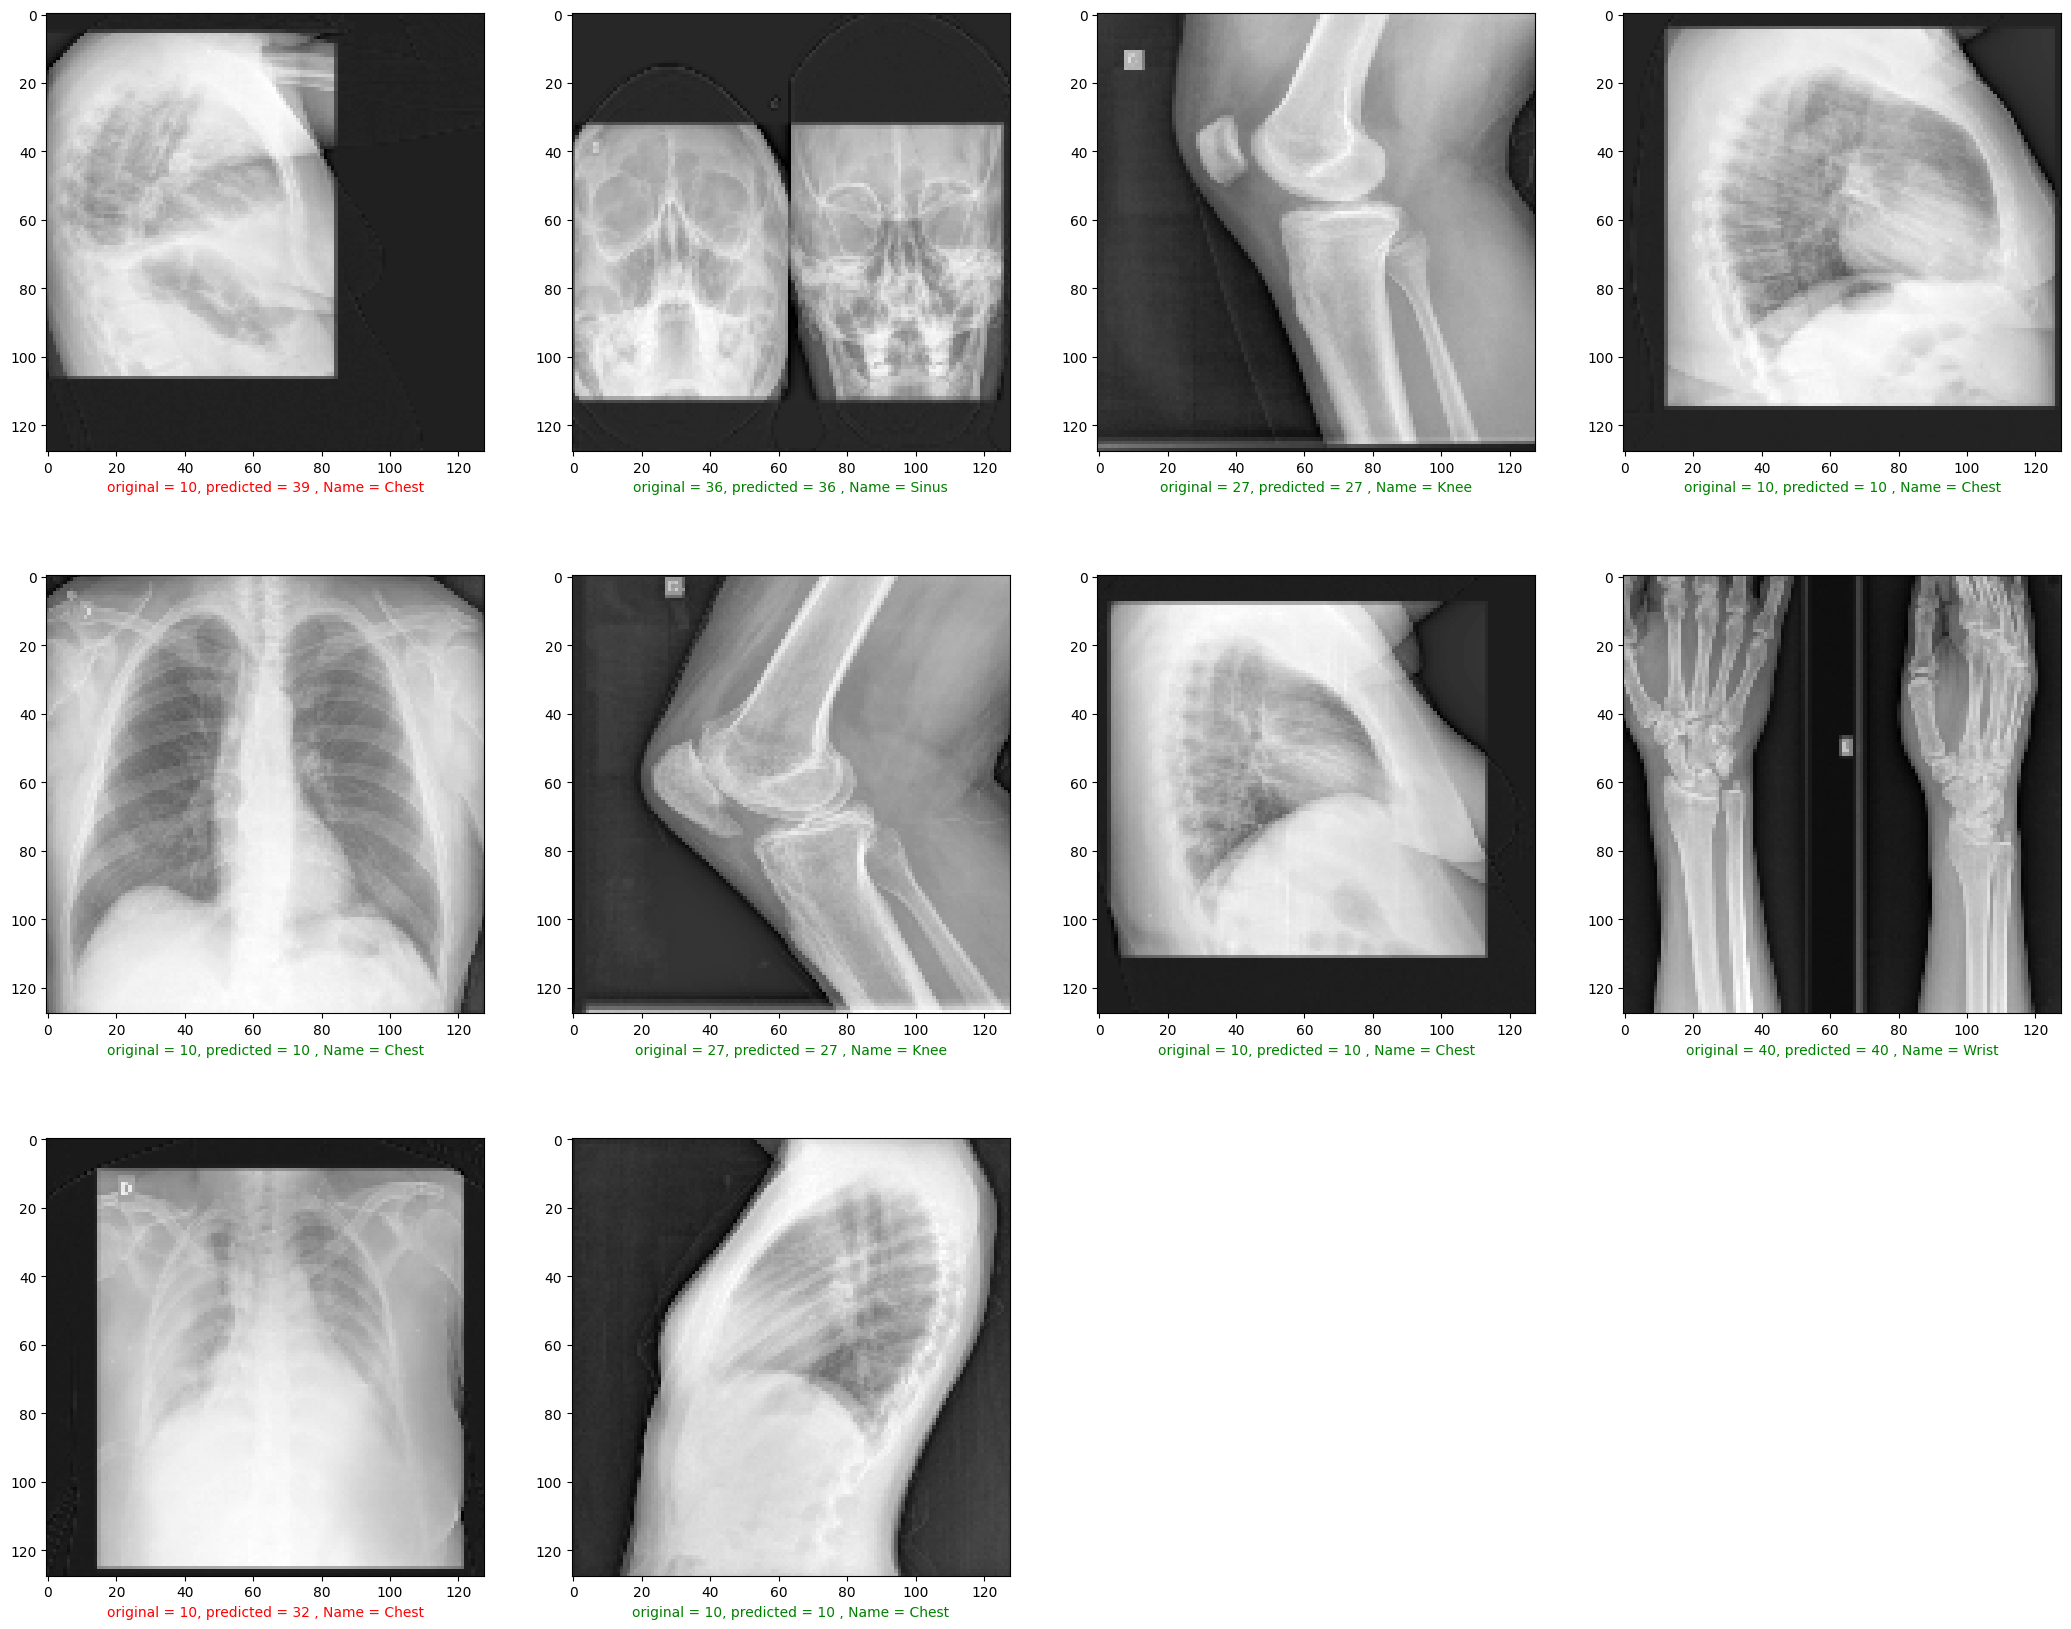

In [48]:
plt.figure(figsize=(26,28))
y_pred = model.predict(x_test)
for i in range(10):
    y_predd = np.argmax(y_pred[i])
    original = np.argmax(y_test[i])

    col = 'g'
    if y_predd != original:
        col = 'r'

    plt.subplot(4,4,i+1)
    origi = Names_rev(str(original))
    label = Names_rev(str(y_predd))
    strr = names_col[original]

    plt.xlabel(f'original = {origi}, predicted = {label} , Name = {strr}',color=col)
    plt.imshow(x_test[i],cmap='gray')

In [52]:

for val in test_data.SOPInstanceUID:
    idd = val
    val = val + '-c.png'
    img = plt.imread(TEST_PATH + val)
    img = cv2.resize(img,dsize=(128,128))
    test_inp.append(np.expand_dims(img,axis=-1))

test_inp = np.array(test_inp)

In [53]:
pred = model.predict(test_inp)
pred.shape

55/55 [==============================] - 1s 21ms/step


(1738, 41)

In [54]:
output = []
for i in range(743):
    label = str(np.argmax(pred[i]))
    output.append(Names_rev(label))


In [60]:
sub = pd.read_csv('/content/sample_submission.csv')
sub['SOPInstanceUID'] = test_data['SOPInstanceUID']
sub['Target'] = output

In [61]:
sub.to_csv('my_submit.csv',index=False)

In [62]:
sb = pd.read_csv('./my_submit.csv')
sb.head(40)

SOPInstanceUID Target
0   1.2.826.0.1.3680043.8.498.10025629581362719970...      0
1   1.2.826.0.1.3680043.8.498.10036150326276641158...     33
2   1.2.826.0.1.3680043.8.498.10038426859954986240...     29
3   1.2.826.0.1.3680043.8.498.10050991192143676483...     32
4   1.2.826.0.1.3680043.8.498.10053309524595490852...     10
5   1.2.826.0.1.3680043.8.498.10053755320637729867...     10
6   1.2.826.0.1.3680043.8.498.10062189329714053601...     32
7   1.2.826.0.1.3680043.8.498.10065930002825553435...  13 20
8   1.2.826.0.1.3680043.8.498.10072001800484199846...     10
9   1.2.826.0.1.3680043.8.498.10077219503857952412...     10
10  1.2.826.0.1.3680043.8.498.10080310665124574896...     10
11  1.2.826.0.1.3680043.8.498.10089082474655893722...     32
12  1.2.826.0.1.3680043.8.498.10092177056782233773...     10
13  1.2.826.0.1.3680043.8.498.10093718510761734264...     10
14  1.2.826.0.1.3680043.8.498.10096016393614468374...     15
15  1.2.826.0.1.3680043.8.498.10100428214462026127...     32
16  1.2.826.0.1.3680043.8.498.10105498531842222086...     10
17  1.2.826.0.1.3680043.8.498.10107388868056003719...      0
18  1.2.826.0.1.3680043.8.498.10121269997000927609...     36
19  1.2.826.0.1.3680043.8.498.10135999234351484423...      7
20  1.2.826.0.1.3680043.8.498.10144276773552601236...     10
21  1.2.826.0.1.3680043.8.498.10151099395979621308...     10
22  1.2.826.0.1.3680043.8.498.10159498614160056038...     17
23  1.2.826.0.1.3680043.8.498.10166555243811009418...   9 21
24  1.2.826.0.1.3680043.8.498.10173439720612301112...     10
25  1.2.826.0.1.3680043.8.498.10181745787571911943...      0
26  1.2.826.0.1.3680043.8.498.10184934709444914820...     10
27  1.2.826.0.1.3680043.8.498.10189313814635816234...     32
28  1.2.826.0.1.3680043.8.498.10198430461266745202...     10
29  1.2.826.0.1.3680043.8.498.10207698807499447804...     10
30  1.2.826.0.1.3680043.8.498.10223562747252542050...     22
31  1.2.826.0.1.3680043.8.498.10225820367742068431...     35
32  1.2.826.0.1.3680043.8.498.10229701585590529671...     17
33  1.2.826.0.1.3680043.8.498.10232698224762232837...     18
34  1.2.826.0.1.3680043.8.498.10234738119248404005...     10
35  1.2.826.0.1.3680043.8.498.10238604796624787944...     10
36  1.2.826.0.1.3680043.8.498.10242799675195671634...     27
37  1.2.826.0.1.3680043.8.498.10254957604285715084...     10
38  1.2.826.0.1.3680043.8.498.10260924317023120140...     32
39  1.2.826.0.1.3680043.8.498.10274278970774000185...     10